In [2]:
#from jupyterthemes import jtplot
#jtplot.style('monokai')

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
from scipy import linalg as la
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#eigenvalues and eigenvectors of the covariance matrix
N = 3000

mu_1 = 0
sigma_1 = 1

mu_2 = 0
sigma_2 = 3

x1 = np.random.normal(loc = mu_1, scale = sigma_1, size = N)
x2 = x1 + np.random.normal(loc = mu_2, scale = sigma_2, size = N)
x3 = 2 * x1 + x2

X = np.array([x1, x2, x3])


In [3]:
cov_matrix = np.cov(X) #covariance matrix with numpy
l, V = la.eig(cov_matrix) #eigenvalues and eigenvectors with scipy
print('The covariance matrix is:\n', cov_matrix)
print('\nThe eigenvalues of the covariance matrix are:\n', l)
print('\nThe eigenvectors of the covariance matrix are:\n', V)

The covariance matrix is:
 [[ 0.98827676  1.07030806  3.04686159]
 [ 1.07030806  9.6074028  11.74801892]
 [ 3.04686159 11.74801892 17.84174209]]

The eigenvalues of the covariance matrix are:
 [2.65506391e+01+0.j 9.28881202e-16+0.j 1.88678252e+00+0.j]

The eigenvectors of the covariance matrix are:
 [[-0.12070573 -0.81649658  0.56459141]
 [-0.5707747  -0.40824829 -0.71242513]
 [-0.81218616  0.40824829  0.41675769]]


In [4]:
#singular value decomposition
U, spectrum, Vt = la.svd(X)

#The columns of U are the eigenvectors
print('Eigenvectors from SVD: \n', U)
print('\nEigenvectors with previous method: \n', V)
#They are printed out in a different order

Eigenvectors from SVD: 
 [[-0.12078022  0.56457548 -0.81649658]
 [-0.57068071 -0.71250043 -0.40824829]
 [-0.81224114  0.41665053  0.40824829]]

Eigenvectors with previous method: 
 [[-0.12070573 -0.81649658  0.56459141]
 [-0.5707747  -0.40824829 -0.71242513]
 [-0.81218616  0.40824829  0.41675769]]


In [5]:
Lambda = np.diag(l)

#just by looking at the matrix I see that the two biggest eigenvalues are in [0,0] and [2,2]
print (Lambda)

perc_expl1 = Lambda[0,0] / Lambda.trace()
print('\n[0,0]: ', perc_expl1)
perc_expl2 = (Lambda[0,0] + Lambda[2,2]) / Lambda.trace()
print('[0,0] and [2,2]: ', perc_expl2)

#To overcome 99% I need to consider both but this make sense. When we build x2 we add 
#'new information' with the second normal distribution, while x3 can be totally recovered
#from x1 and x2 by construction.

[[2.65506391e+01+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 9.28881202e-16+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 1.88678252e+00+0.j]]

[0,0]:  (0.9336514210262024+0j)
[0,0] and [2,2]:  (0.9999999999999999+0j)


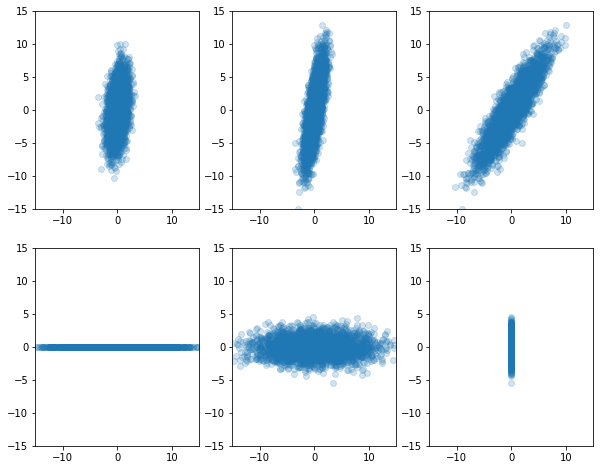

In [6]:
#In the new basis

X_ = np.dot(V.T, X)

fig, axes = plt.subplots(2,3, figsize=(10,8))
scale_factor = 0.1

axes[0,0].scatter(X[0],X[1],alpha=0.2)
axes[0,0].set_ylim(-15, 15)
axes[0,0].set_xlim(-15, 15)

axes[0,1].scatter(X[0,:],X[2,:],alpha=0.2)
axes[0,1].set_ylim(-15, 15)
axes[0,1].set_xlim(-15, 15)

axes[0,2].scatter(X[1,:],X[2,:],alpha=0.2)
axes[0,2].set_ylim(-15, 15)
axes[0,2].set_xlim(-15, 15)

axes[1,0].scatter(X_[0],X_[1],alpha=0.2)
axes[1,0].set_ylim(-15, 15)
axes[1,0].set_xlim(-15, 15)

axes[1,1].scatter(X_[0,:],X_[2,:],alpha=0.2)
axes[1,1].set_ylim(-15, 15)
axes[1,1].set_xlim(-15, 15)

axes[1,2].scatter(X_[1,:],X_[2,:],alpha=0.2)
axes[1,2].set_ylim(-15, 15)
axes[1,2].set_xlim(-15, 15)

plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [7]:
n = 10
random_noise = np.zeros((n, N))
sigma = 1./50

for i in range(n):
    random_noise[i] = np.random.normal(loc = 0.0, scale = sigma, size = (N))
    
for i in range(3):
    for j in range(n):
        X[i] = X[i] + random_noise[j]

In [8]:
cov_matrix = np.cov(X) #covariance matrix with numpy
l, V = la.eig(cov_matrix) #eigenvalues and eigenvectors with scipy

Lambda = np.diag(l)

#just by looking at the matrix I see that the two biggest eigenvalues are in [0,0] and [2,2]
print (Lambda)

perc_expl1 = Lambda[0,0] / Lambda.trace()
print('\n[0,0]: ', perc_expl1)
perc_expl2 = (Lambda[0,0] + Lambda[2,2]) / Lambda.trace()
print('[0,0] and [2,2]: ', perc_expl2)

[[2.66164932e+01+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 2.63020427e-03+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 1.88631696e+00+0.j]]

[0,0]:  (0.9337338018091236+0j)
[0,0] and [2,2]:  (0.9999077297442998+0j)


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


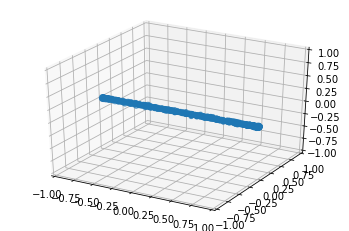

In [9]:
#25_11_2020
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

def rotate(x, theta, phi):
    rotate_x = [[np.cos(theta), -np.sin(theta), 0],
                [np.sin(theta),  np.cos(theta), 0],
                [0,0,1]]
    rotate_y = [[np.cos(phi), 0, -np.sin(phi)],
                [0,1,0],
                [np.sin(phi), 0,  np.cos(phi)]]
    return np.dot(np.dot(rotate_x, rotate_y) ,x)

N = 1000
mean_y = 0
sigma_y = 0.01
mean_z = 0
sigma_z = 0.01
mesh = np.random.uniform(0, 2.0, size = N)
spring_3D = np.array([np.cos(2 * np.pi * mesh), 
                  np.random.normal(loc = mean_y, scale = sigma_y, size = N),
                  np.random.normal(loc = mean_z, scale = sigma_z, size = N)])

ax.scatter(spring_3D[0], spring_3D[1], spring_3D[2])
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

plt.show()

In [12]:
spring_3D_rotate = []
angles = []

theta_list = [np.pi / 2, #theta camera 1
              np.pi / 3, #theta camera 2
              np.pi / 5, #theta camera 3
              np.pi / 4, #theta camera 4
              np.pi / 6] #theta camera 5

phi_list = [np.pi / 2,   #phi camera 1
            np.pi / 3,   #phi camera 2
            np.pi / 5,   #phi camera 3
            np.pi / 4,   #phi camera 4
            np.pi / 6]   #phi camera 5

for theta,phi in zip(theta_list, phi_list):
    spring_3D_rotate.append(rotate(spring_3D, theta, phi))
    angles.append([theta,phi])
    
for i in spring_3D_rotate:
    l, V = la.eig(np.cov(i))
    print(l)
    
#the first eigenvalue is always the greatest, so only one axis is important

[5.03031460e-01+0.j 9.75458505e-05+0.j 1.01857987e-04+0.j]
[5.03031460e-01+0.j 9.75458505e-05+0.j 1.01857987e-04+0.j]
[5.03031460e-01+0.j 9.75458505e-05+0.j 1.01857987e-04+0.j]
[5.03031460e-01+0.j 9.75458505e-05+0.j 1.01857987e-04+0.j]
[5.03031460e-01+0.j 9.75458505e-05+0.j 1.01857987e-04+0.j]


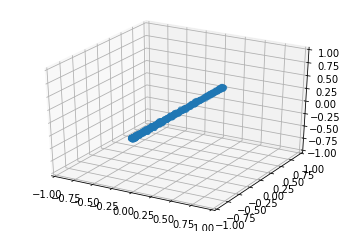

In [13]:
#just to show that the implementation with rotation matrices works properly
fig= plt.figure()
ax = fig.add_subplot(111, projection = '3d')

spring_3D_rotate = rotate(spring_3D, np.pi / 2, 0) #rotating of 90 degrees in theta

ax.scatter(spring_3D_rotate[0], spring_3D_rotate[1], spring_3D_rotate[2])
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.show()

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [14]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [15]:
#25_11_2020
columns_labels = ['feature1',
                  'feature2',
                  'feature3',
                  'feature4',
                  'feature5',
                  'feature6',
                  'feature7',
                  'feature8',
                  'feature9',
                  'feature10',
                  'event']

magic_data = pd.read_csv('/Users/tommasofaorlin/data/magic04.data', 
                  index_col = False, 
                  names = columns_labels)

#I decide to concentrate on gamma events rather than hadrons since the latter are background
gamma_mask =  magic_data['event'] == 'g'
magic_data_gamma = magic_data[gamma_mask]
magic_data = magic_data_gamma.drop(columns = ['event'])
np_magic_data = magic_data.to_numpy()
np_magic_data = np_magic_data.reshape(10, 12332)
cov_matrix = np.cov(np_magic_data)
l, V = la.eig(cov_matrix)

#I do PCA by changing the number of eigenvalues until I overcome 99%
n = 9 #select with n how many 'greatest' eigenvalues you want to consider
n_greatest = []
k = l.flatten()
k.sort()
Lambda = np.diag(l)
perc = 0
 
for i in range(n):
    perc += Lambda[ np.where(l == k[- (i + 1)]),
                    np.where(l == k[- (i + 1)]) ] / Lambda.trace()
    print(perc)
    
#notice that using 9 out of 10 eigenvalues you are not able to reach 99%, so you have to 
#be satisfied with a lower bound that corresponds to a more loss of informations

[[0.2254527+0.j]]
[[0.44568362+0.j]]
[[0.63273547+0.j]]
[[0.81788297+0.j]]
[[0.88267186+0.j]]
[[0.90725281+0.j]]
[[0.9315061+0.j]]
[[0.954546+0.j]]
[[0.97739893+0.j]]
